In [44]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
# Set figure parameters
sc.set_figure_params(dpi=100, vector_friendly=True)
sns.set(style="ticks")
# vector_friendly=True rasterizes large objects (such as dots in a scatterplot as pixels).
# More at https://scanpy.readthedocs.io/en/stable/generated/scanpy.set_figure_params.html

There are several algorithms for spatial domain identification. In [Kang et al.](https://academic.oup.com/nar/article/53/7/gkaf303/8114322), the authors benchmarked several works and found GraphST to work best. 

![Kang et al. Figure 1](../images/gkaf303fig1.jpeg)

Overview of [GraphST](https://www.nature.com/articles/s41467-023-36796-3): 

![GraphST Figure 1](../images/graphST.png)

<u>Task:</u> 

Read processed data from last step, cluster with GraphST on one slide (or optionally, use PASTE first to align and then cluster with GrapST).  
Check issue: [GraphST with multiple samples, general question](https://github.com/JinmiaoChenLab/GraphST/issues/14)

[Link to GraphST tutorials](https://deepst-tutorials.readthedocs.io/)

In [4]:
## read processed data
data = sc.read("visium_v1_processed.h5ad")

GraphST runs per slide. To run it across multiple slides, GraphST uses PASTE algorithm for alignment. In this tutorial, we'll use only one slide. 

In [11]:
data.obs["Slide_ID"].value_counts()

Slide_ID
V4_B    843
V5_D    752
V1_A    726
V3_C    722
V4_C    678
V2_D    676
V2_B    641
V6_D    619
V3_A    618
V6_C    590
V1_D    539
V6_B    521
V5_A    496
V3_D    481
V5_B    463
V5_C    402
V6_A    392
V4_D    367
V2_C    237
Name: count, dtype: int64

In [12]:
slide = "V4_B"
sub = data[data.obs["Slide_ID"]=="V4_B"]

In [13]:
device = "cpu" # we do not have GPU in this machine

In [ ]:
## run GraphST and cluster

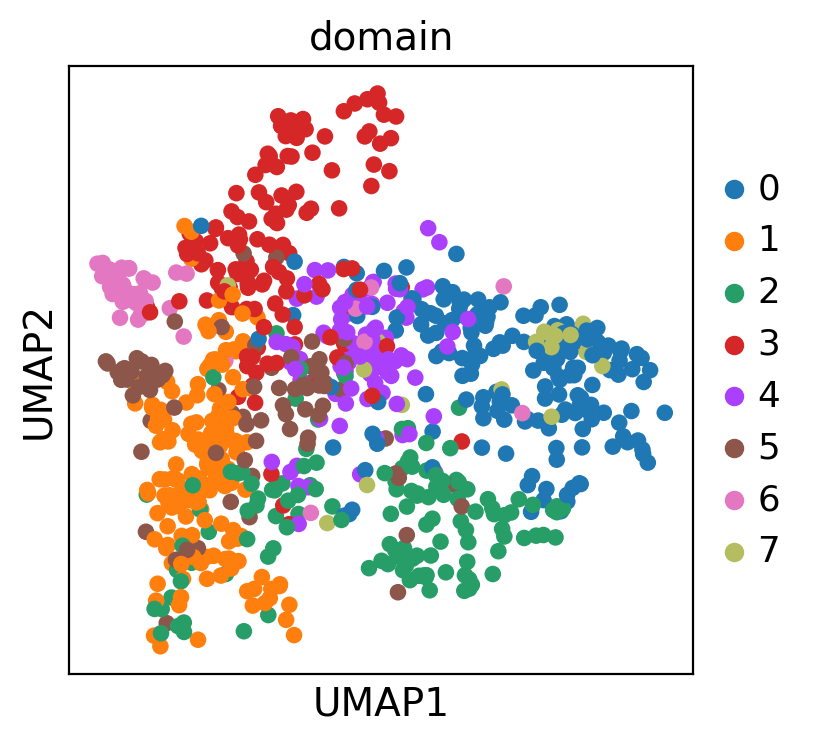

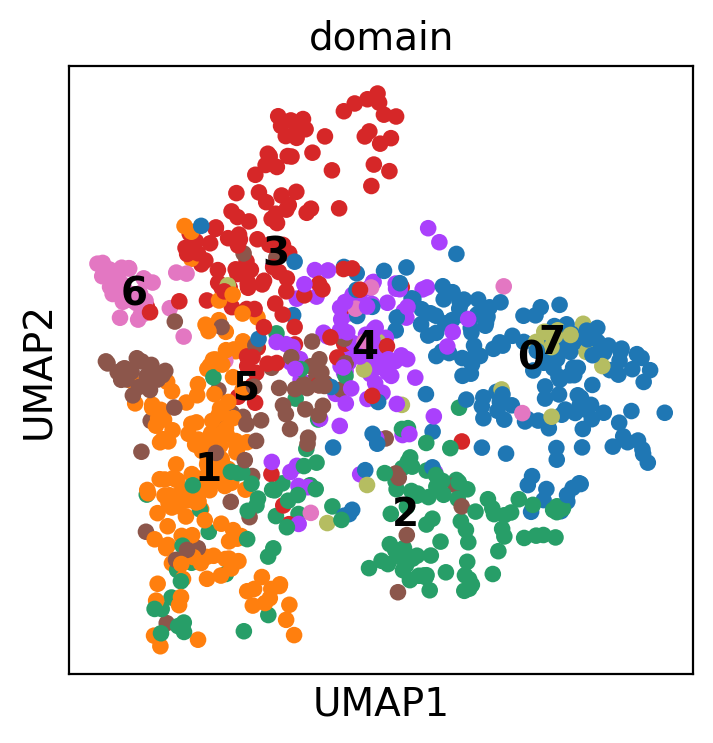

In [28]:
## Plot over UMAP the GraphST clusters


/tmp/ipykernel_6507/264447520.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(sub, library_id=slide, color="domain")


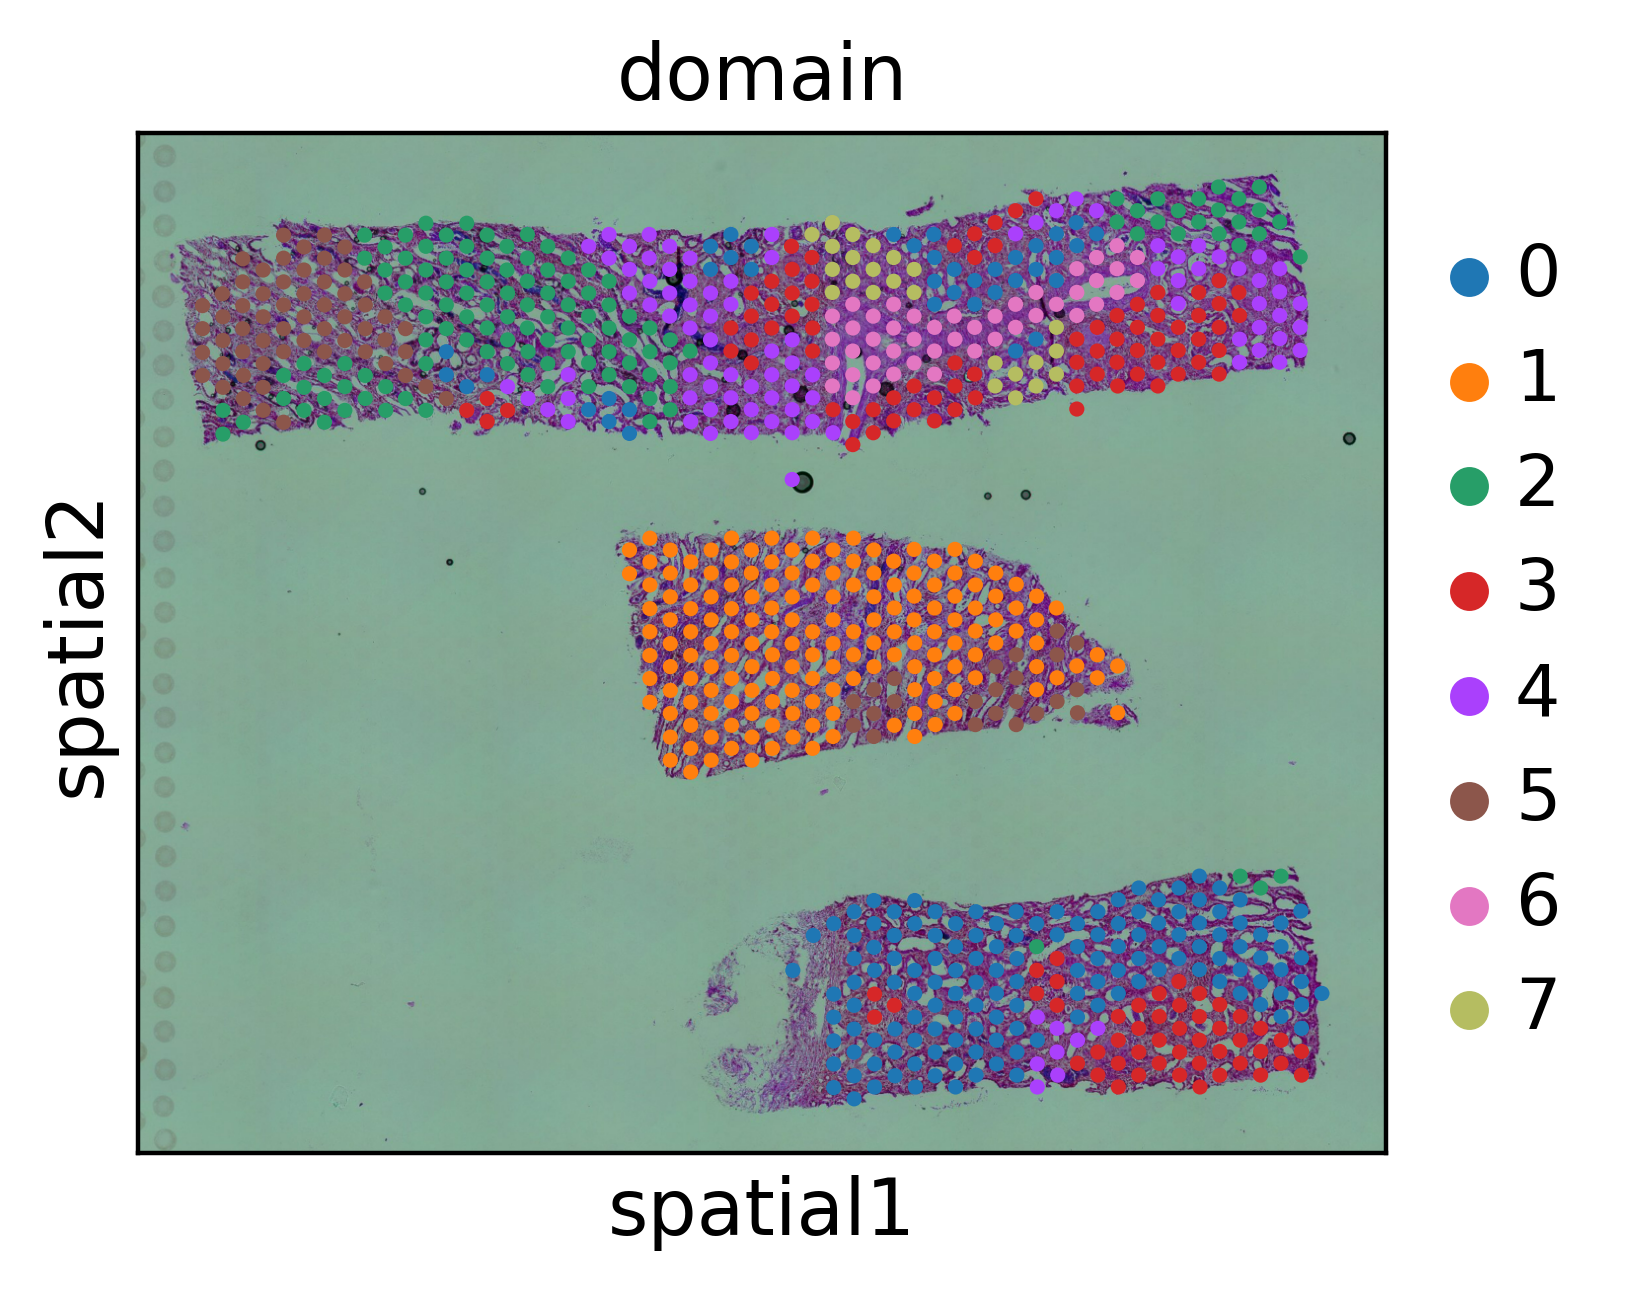

In [30]:
## Plot spatial


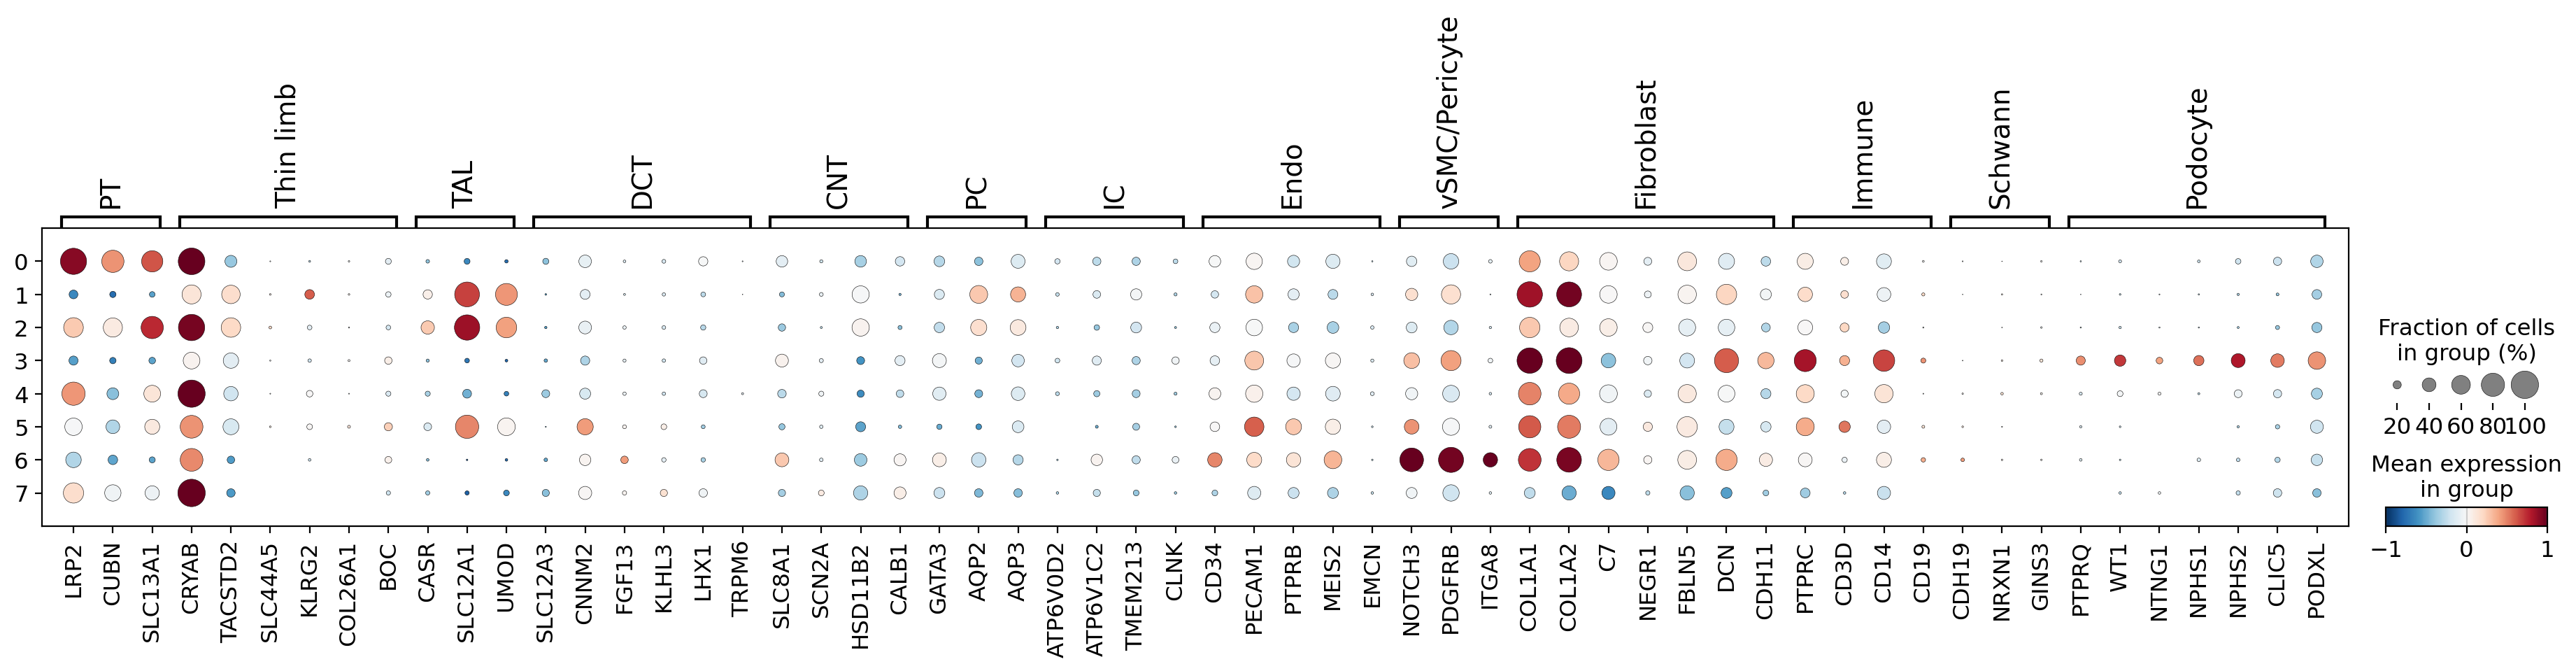

In [35]:
## Compare with known cell type markers (marker dictionary from JSON)

import json
with open("kidney_markers.json", "r") as fp:
    markers = json.load(fp)

sc.pl.dotplot(...)

<Axes: xlabel='domain', ylabel='cluster'>

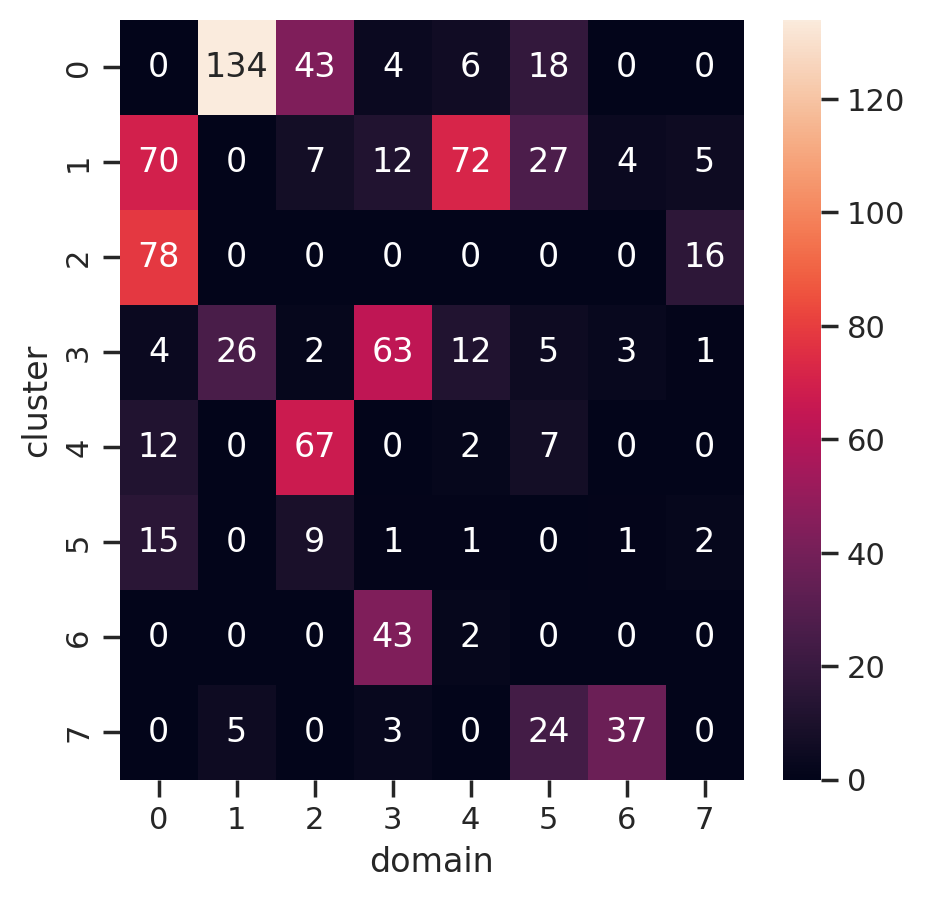

In [45]:
## Compare with leiden clustering with resolution 0.35 (saved in "cluster" in the previous step). Heatmap or some other approach



An advantage of GraphST is that it can take a single-cell reference data and provide deconvolution results (i.e. cell type proportions for each spot) on top of providing spatial domains.
    

We have a single-cell reference data from kidney at /shared/spatial-workshop-GCB-2025/kidney_sc.h5ad. This dataset comes from [Stewart et al., 2019](https://www.science.org/doi/10.1126/science.aat5031).

<u>Task:</u>

Perform cell type deconvolution with GraphST

## Cell type deconvolution with GrapST requires following steps:
1. preprocessing of single-cell data
2. preprocessing of spatial data
3. Computation of spot-to-spot interactive graphs (interaction graph is the distance between a spot and its three neighbors. See https://github.com/JinmiaoChenLab/GraphST/blob/d62b0b7b6cd38ee285f3ac8cd67b7341a10bcc74/GraphST/preprocess.py#L53
4. Construct contrastive label matrix. For all spots in the data, it will be [0,1]. See panel C in the GraphST overview figure above or go to https://github.com/JinmiaoChenLab/GraphST/blob/d62b0b7b6cd38ee285f3ac8cd67b7341a10bcc74/GraphST/preprocess.py#L121
5. Stores expression of all features (by default, all genes) in .obsm. Also, stores a permuted version.

In [53]:
data_sc = sc.read("kidney_sc.h5ad")

In [ ]:
## deconvoluve sub with data_sc with GraphST.
## Tutorial - https://deepst-tutorials.readthedocs.io/en/latest/Tutorial%202_scRNA%20and%20ST%20data%20integration.html



In [92]:
## make dotplot of GraphST domains by cell type proportions


In [ ]:
## make dotplot of leiden clusters by cell type proportions

<u>Task:</u>

How does the deconvolution results compare with published annotations done at lower resolution (load clustering: /home/shared/spatial-workshop-GCB-2025/visium_v1_compartments_gex.csv )


In [97]:
## save results
sub.write(f"{slide}_GraphST.h5ad")

<u>Task:</u>

Run [Mender](https://www.nature.com/articles/s41467-023-44367-9) on all slides as it allows for "easier" batch correction compared to GraphST, compare with complete leiden clustering, check homogeneity of markers and save the output. [Code](https://github.com/yuanzhiyuan/MENDER) and [Tutorial](https://mender-tutorial.readthedocs.io/en/latest/Visium_brain01.html).